In [1]:
# Widget related imports
import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript
from traitlets import Unicode

# nbconvert related imports
from nbconvert import get_export_names, export_by_name
from nbconvert.writers import FilesWriter
from nbformat import read, NO_CONVERT
from nbconvert.utils.exceptions import ConversionException

This notebook shows a really roundabout way to get the name of the notebook file using widgets.  The true purpose of this demo is to demonstrate how Javascript and Python widget models are related by `id`.

Create a text Widget without displaying it.  The widget will be used to store the notebook's name which is otherwise only available in the front-end.

In [2]:
notebook_name = widgets.Text()

Get the current notebook's name by pushing JavaScript to the browser that sets the notebook name in a string widget.

In [3]:
js = """IPython.notebook.kernel.widget_manager.get_model('%s').then(function(model) {
    model.set('value', IPython.notebook.notebook_name);
    model.save();
});
""" % notebook_name.model_id
display(Javascript(data=js))

<IPython.core.display.Javascript object>

In [4]:
filename = notebook_name.value
filename

'Export As (nbconvert).ipynb'

Create the widget that will allow the user to Export the current notebook.

In [5]:
exporter_names = widgets.Dropdown(options=get_export_names(), value='html')
export_button = widgets.Button(description="Export")
download_link = widgets.HTML(visible=False)

Export the notebook when the export button is clicked.

In [6]:
file_writer = FilesWriter()

def export(name, nb):
    
    # Get a unique key for the notebook and set it in the resources object.
    notebook_name = name[:name.rfind('.')]
    resources = {}
    resources['unique_key'] = notebook_name
    resources['output_files_dir'] = '%s_files' % notebook_name

    # Try to export
    try:
        output, resources = export_by_name(exporter_names.value, nb)
    except ConversionException as e:
        download_link.value = "<br>Could not export notebook!"
    else:
        write_results = file_writer.write(output, resources, notebook_name=notebook_name)
    
        download_link.value = "<br>Results: <a href='files/{filename}'><i>\"{filename}\"</i></a>".format(filename=write_results)
        download_link.visible = True
        
def handle_export(widget):
    with open(filename, 'r') as f:
        export(filename, read(f, NO_CONVERT))
        
export_button.on_click(handle_export)

Display the controls.

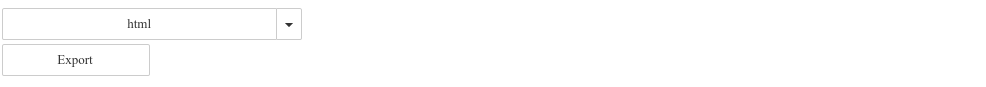

In [7]:
display(exporter_names, export_button, download_link)